# Brazil Covid 19 Dataset

In [1]:
%%HTML
<style type="text/css">
div.h1 {
    background-color: #009C37; 
    color: white; padding: 8px; padding-right: 300px; font-size: 35px; max-width: 1500px; margin: auto; margin-top: 50px;}
div.h2 {
    background-color: #002277; 
    color: white; padding: 8px; padding-right: 300px; font-size: 25px; max-width: 1500px; margin: auto; margin-top: 50px;}
div.h3 {
    color: #002277;
    font-size: 16px; margin-top: 20px; margin-bottom:4px;}
div.h4 {
    font-size: 15px; margin-top: 20px; margin-bottom: 8px;
span.note {
    font-size: 5; color: #002277;
    font-style: italic;}
span.captiona {
    font-size: 5; color: dimgray; font-style: italic; margin-left: 130px; vertical-align: top;}
hr {
    display: block; color: #002277;
    height: 1px; border: 0;  border-top: 1px solid;}
hr.light {
    display: block; color: lightgray; height: 1px; border: 0; border-top: 1px solid;}
</style>

In [2]:
# load library
!pip install catboost

In [3]:
# load libraries
!pip install pystacknet

ERROR: Could not find a version that satisfies the requirement pystacknet (from versions: none)
ERROR: No matching distribution found for pystacknet


In [4]:
# Load libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
# Lgbm
import lightgbm as lgb
import catboost
from catboost import Pool
import xgboost as xgb


# Suppr warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load libraries
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as patches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)


In [6]:
# Load library
!pip install quilt

In [7]:
# Load Data
dataset = pd.read_excel('covid19_clinical_dataset.xlsx')
dataset.columns = [x.lower().strip().replace(' ','_') for x in dataset.columns]

In [8]:
dataset

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,mean_corpuscular_hemoglobin_(mch),eosinophils,mean_corpuscular_volume_(mcv),monocytes,red_blood_cell_distribution_width_(rdw),serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus/enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg/dl,creatinine,potassium,sodium,"influenza_b,_rapid_test","influenza_a,_rapid_test",alanine_transaminase,aspartate_transaminase,gamma-glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),fio2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),rods_#,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_-_esterase,urine_-_aspect,urine_-_ph,urine_-_hemoglobin,urine_-_bile_pigments,urine_-_ketone_bodies,urine_-_nitrite,urine_-_density,urine_-_urobilinogen,urine_-_protein,urine_-_sugar,urine_-_leukocytes,urine_-_crystals,urine_-_red_blood_cells,urine_-_hyaline_cylinders,urine_-_granular_cylinders,urine_-_yeasts,urine_-_color,partial_thromboplastin_time (ptt),relationship_(patient/normal),international_normalized_ratio_(inr),lactic_dehydrogenase,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [9]:
# Let's check columns
dataset.columns

Index(['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume',
       ...
       'hb_saturation_(arterial_blood_gases)',
       'pco2_(arterial_blood_gas_analysis)',
       'base_excess_(arterial_blood_gas_analysis)',
       'ph_(arterial_blood_gas_analysis)',
       'total_co2_(arterial_blood_gas_analysis)',
       'hco3_(arterial_blood_gas_analysis)',
       'po2_(arterial_blood_gas_analysis)', 'arteiral_fio2', 'phosphor',
       'cto2_(arterial_blood_gas_analysis)'],
      dtype='object', length=111)

In [10]:
# check shape of data
print('Size of the data', dataset.shape)

Size of the data (5644, 111)


In [11]:
# Let's check dataset columns values
dataset.columns.values

array(['patient_id', 'patient_age_quantile', 'sars-cov-2_exam_result',
       'patient_addmited_to_regular_ward_(1=yes,_0=no)',
       'patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)',
       'patient_addmited_to_intensive_care_unit_(1=yes,_0=no)',
       'hematocrit', 'hemoglobin', 'platelets', 'mean_platelet_volume',
       'red_blood_cells', 'lymphocytes',
       'mean_corpuscular_hemoglobin_concentration\xa0(mchc)',
       'leukocytes', 'basophils', 'mean_corpuscular_hemoglobin_(mch)',
       'eosinophils', 'mean_corpuscular_volume_(mcv)', 'monocytes',
       'red_blood_cell_distribution_width_(rdw)', 'serum_glucose',
       'respiratory_syncytial_virus', 'influenza_a', 'influenza_b',
       'parainfluenza_1', 'coronavirusnl63', 'rhinovirus/enterovirus',
       'mycoplasma_pneumoniae', 'coronavirus_hku1', 'parainfluenza_3',
       'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4',
       'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009',
       'bordetella_pe

In [12]:
# Let's check initial 5 rows
dataset.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,mean_corpuscular_hemoglobin_(mch),eosinophils,mean_corpuscular_volume_(mcv),monocytes,red_blood_cell_distribution_width_(rdw),serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus/enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg/dl,creatinine,potassium,sodium,"influenza_b,_rapid_test","influenza_a,_rapid_test",alanine_transaminase,aspartate_transaminase,gamma-glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),fio2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),rods_#,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_-_esterase,urine_-_aspect,urine_-_ph,urine_-_hemoglobin,urine_-_bile_pigments,urine_-_ketone_bodies,urine_-_nitrite,urine_-_density,urine_-_urobilinogen,urine_-_protein,urine_-_sugar,urine_-_leukocytes,urine_-_crystals,urine_-_red_blood_cells,urine_-_hyaline_cylinders,urine_-_granular_cylinders,urine_-_yeasts,urine_-_color,partial_thromboplastin_time (ptt),relationship_(patient/normal),international_normalized_ratio_(inr),lactic_dehydrogenase,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
# Let's describe data
dataset.describe()

,patient_age_quantile,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,mean_corpuscular_hemoglobin_(mch),eosinophils,mean_corpuscular_volume_(mcv),monocytes,red_blood_cell_distribution_width_(rdw),serum_glucose,mycoplasma_pneumoniae,neutrophils,urea,proteina_c_reativa_mg/dl,creatinine,potassium,sodium,alanine_transaminase,aspartate_transaminase,gamma-glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,magnesium,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),fio2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),rods_#,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_-_density,urine_-_sugar,urine_-_red_blood_cells,partial_thromboplastin_time (ptt),relationship_(patient/normal),international_normalized_ratio_(inr),lactic_dehydrogenase,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,6.030000e+02,6.030000e+02,6.020000e+02,5.990000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.020000e+02,6.010000e+02,6.020000e+02,2.080000e+02,0.0,5.130000e+02,3.970000e+02,5.060000e+02,4.240000e+02,3.710000e+02,3.700000e+02,2.250000e+02,2.260000e+02,1.530000e+02,1.820000e+02,1.820000e+02,1.820000e+02,1.440000e+02,5.000000e+01,4.000000e+01,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,1.0,1.360000e+02,1.360000e+02,1.360000e+02,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,97.0,7.000000e+01,0.0,7.000000e+01,0.0,9.100000e+01,1.330000e+02,1.010000e+02,0.0,3.000000e+00,1.040000e+02,2.300000e+01,2.700000e+01,8.000000e+00,0.0,1.300000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.000000e+01,2.000000e+01,2.700000e+01
mean,9.318391,0.013997,0.008859,0.007264,-2.186214e-09,-1.601319e-08,-3.535004e-10,7.438142e-09,8.424447e-09,-7.866736e-09,1.014863e-09,6.215833e-09,-6.633740e-09,-3.453010e-09,7.206147e-09,-4.155369e-09,-3.220114e-09,1.020433e-08,7.069992e-09,NaN,5.908361e-09,-6.675260e-09,2.779703e-09,-6.679604e-09,2.038366e-08,1.123628e-08,2.719462e-09,-5.439583e-10,-1.479159e-09,-2.783733e-09,1.205602e-08,3.029357e-09,-2.037268e-09,1.907349e-08,-5.215406e-09,-1.935234e-08,1.509290e-08,-1.075130e-09,-7.909394e-09,0.0,-9.121483e-09,3.593467e-09,-4.416934e-09,2.611544e-09,-2.678753e-08,7.373770e-09,8.602732e-09,1.382582e-08,0.0,-2.554485e-09,NaN,7.557017e-09,NaN,-9.824941e-10,-4.733640e-09,1.733551e-09,NaN,-1.986821e-08,-6.483438e-09,7.288611e-09,-1.655685e-09,-3.725290e-09,NaN,-5.731216e-09,-1.379737e-10,8.416397e-09,-1.655685e-09,4.139211e-10,-7.472139e-09,6.070843e-09,-2.469729e-08,4.656613e-09,6.332993e-09,5.243001e-09
std,5.777903,0.117489,0.093713,0.084929,1.000830e+00,1.000830e+00,1.000832e+00,1.000836e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000832e+00,1.000833e+00,1.000832e+00,1.002413e+00,NaN,1.000976e+00,1.001262e+00,1.000990e+00,1.001181e+00,1.001350e+00,1.001354e+00,1.002230e+00,1.002220e+00,1.003284e+00,1.002759e+00,1.002759e+00,1.002759e+00,1.003490e+00,1.010153e+00,1.012739e+00,1.003697e+00,1.003697e+00,1.0036

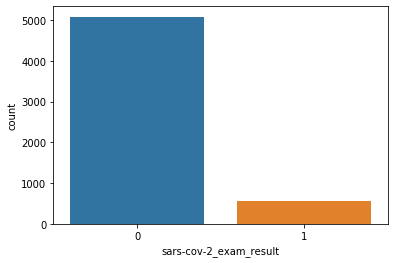

In [14]:
# Examine the Distribution of the Target Column
# Let's Transform the target variable into numeric
dataset['sars-cov-2_exam_result'] = dataset['sars-cov-2_exam_result'].replace(['negative','positive'], [0,1])
sns.countplot(dataset['sars-cov-2_exam_result'])

In [15]:
print("There are {}% target values with 1".format(100 * dataset['sars-cov-2_exam_result'].value_counts()[1]/dataset.shape[0]))

There are 9.886605244507441% target values with 1


In [16]:
# Examine Missing Values
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [17]:
%%time
missing_data(dataset)


Wall time: 115 ms


,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,mean_corpuscular_hemoglobin_(mch),eosinophils,mean_corpuscular_volume_(mcv),monocytes,red_blood_cell_distribution_width_(rdw),serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus/enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg/dl,creatinine,potassium,sodium,"influenza_b,_rapid_test","influenza_a,_rapid_test",alanine_transaminase,aspartate_transaminase,gamma-glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),fio2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),rods_#,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_-_esterase,urine_-_aspect,urine_-_ph,urine_-_hemoglobin,urine_-_bile_pigments,urine_-_ketone_bodies,urine_-_nitrite,urine_-_density,urine_-_urobilinogen,urine_-_protein,urine_-_sugar,urine_-_leukocytes,urine_-_crystals,urine_-_red_blood_cells,urine_-_hyaline_cylinders,urine_-_granular_cylinders,urine_-_yeasts,urine_-_color,partial_thromboplastin_time (ptt),relationship_(patient/normal),international_normalized_ratio_(inr),lactic_dehydrogenase,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
Total,0,0,0,0,0,0,5041,5041,5042,5045,5042,5042,5042,5042,5042,5042,5042,5042,5043,5042,5436,4290,4290,4290,4292,4292,4292,5644,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,5131,5247,5138,5220,5273,5274,4824,4824,5419,5418,5491,5462,5462,5462,5500,5594,5312,5604,5508,5508,5508,5508,5643,5508,5508,5508,5547,5547,5547,5547,5547,5547,5584,5574,5574,5574,5574,5587,5643,5574,5575,5584,5644,5574,5574,5574,5577,5575,5574,5574,5644,5553,5511,5543,5644,5641,5540,5621,5617,5636,5644,5631,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0,0,0,0,0,0,89.3161,89.3161,89.3338,89.387,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3515,89.3338,96.3147,76.0099,76.0099,76.0099,76.0454,76.0454,76.0454,100,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,90.9107,92.966,91.0347,92.4876,93.4266,93.4444,85.4713,85.4713,96.0135,95.9957,97.2892,96.7753,96.7753,96.7753,97.4486,99.1141,94.1176,99.2913,97.5904,97.5904,97.5904,97.5904,99.9823,97.5904,97.5904,97.5904,98.2814,98.2814,98.2814,98.2814,98.2814,98.2814,98.9369,98.7597,98.7597,98.7597,98.7597,98.9901,99.9823,98.7597,98.7775,98.9369,100,98.7597,98.7597,98.7597,98.8129,98.7775,98.7597,98.7597,100,98.3877,97.6435,98.2105,100,99.9468,98.1573,99.5925,99.5216,99.8583,100,99.7697,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.6456,99.6456,99.5216
Types,object,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,float64,object,object,object,object,o

In [18]:
!pip install quilt


In [19]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [20]:
import missingno as msno

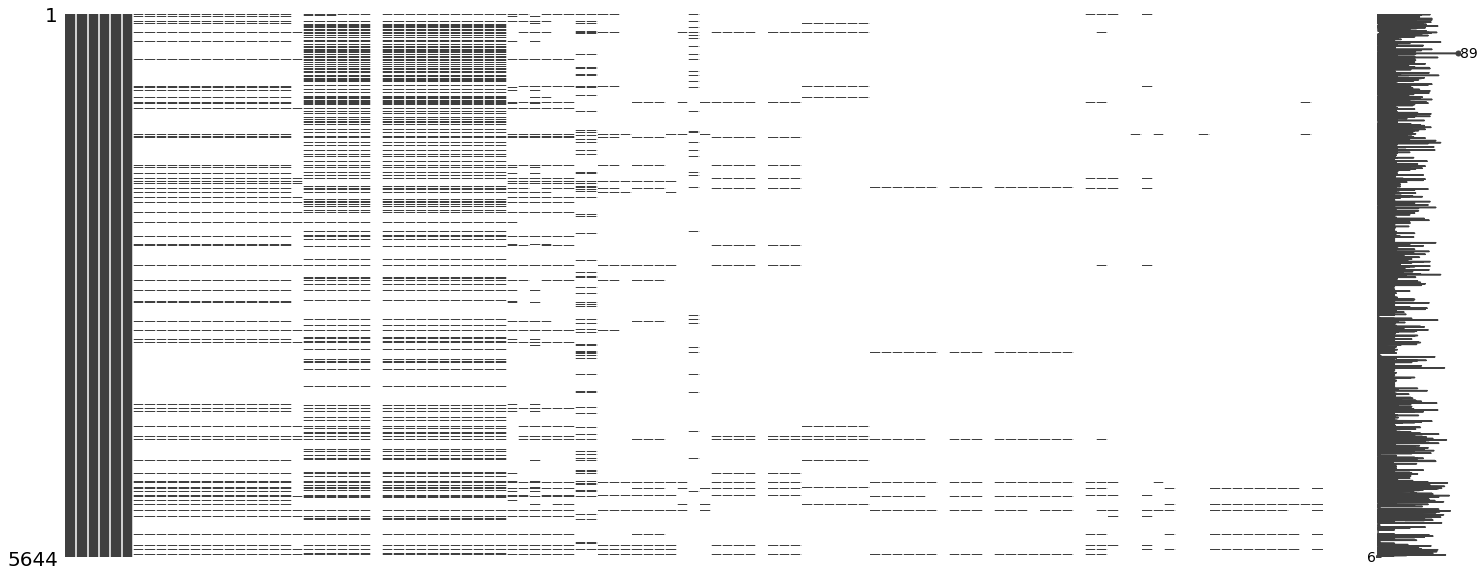

In [21]:
# Nullity Matrix. The msno.matrix nullity matrix is a data-dense display.
# It always lets you quickly visually analyse data completion.
msno.matrix(dataset.head(20000))

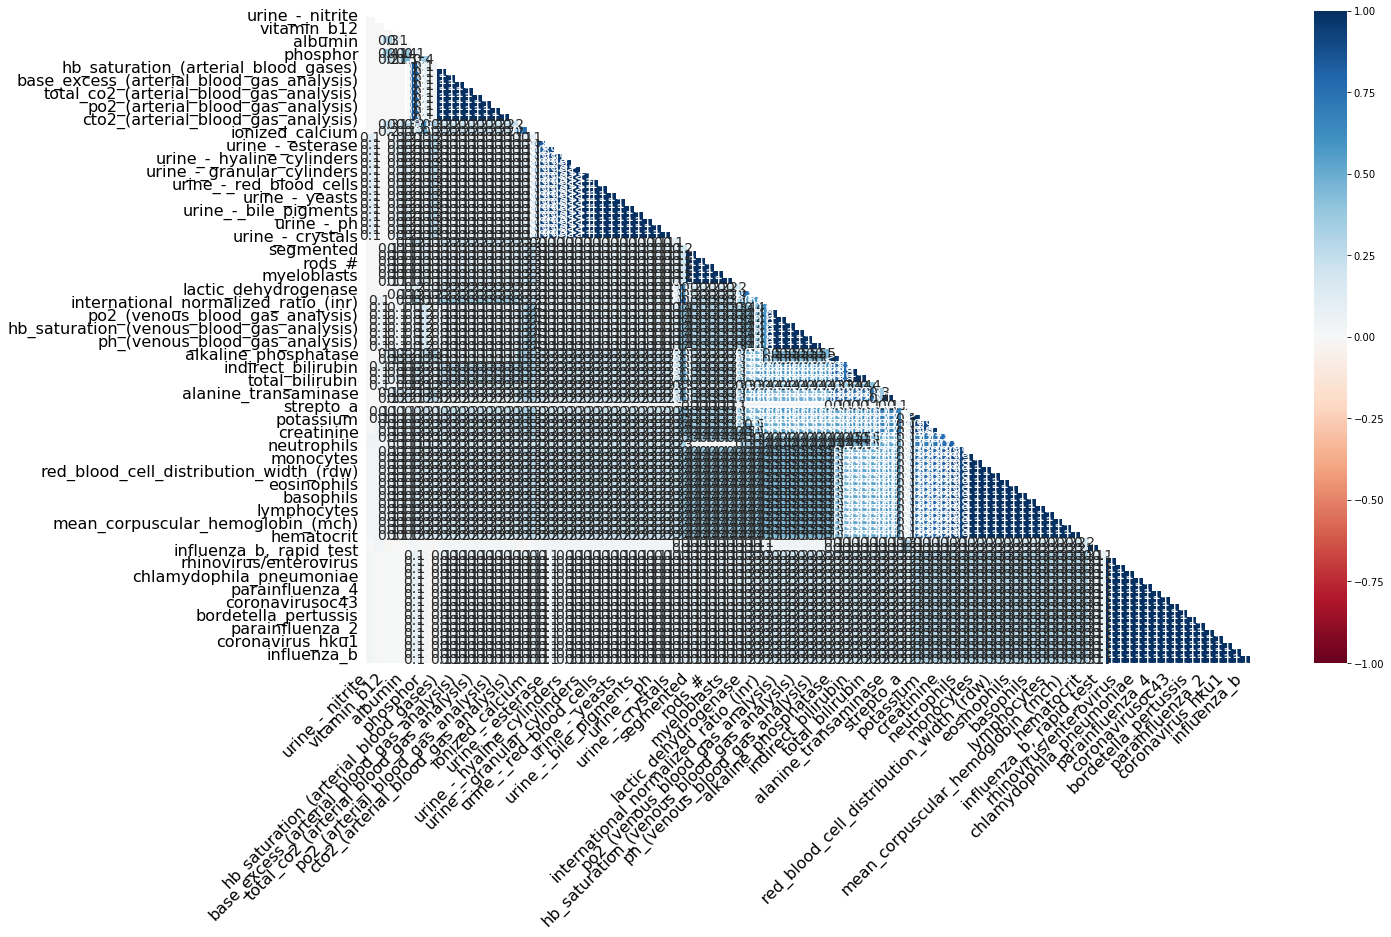

In [22]:
# Now,let's see Heatmap
a = msno.heatmap(dataset, sort='ascending')
a

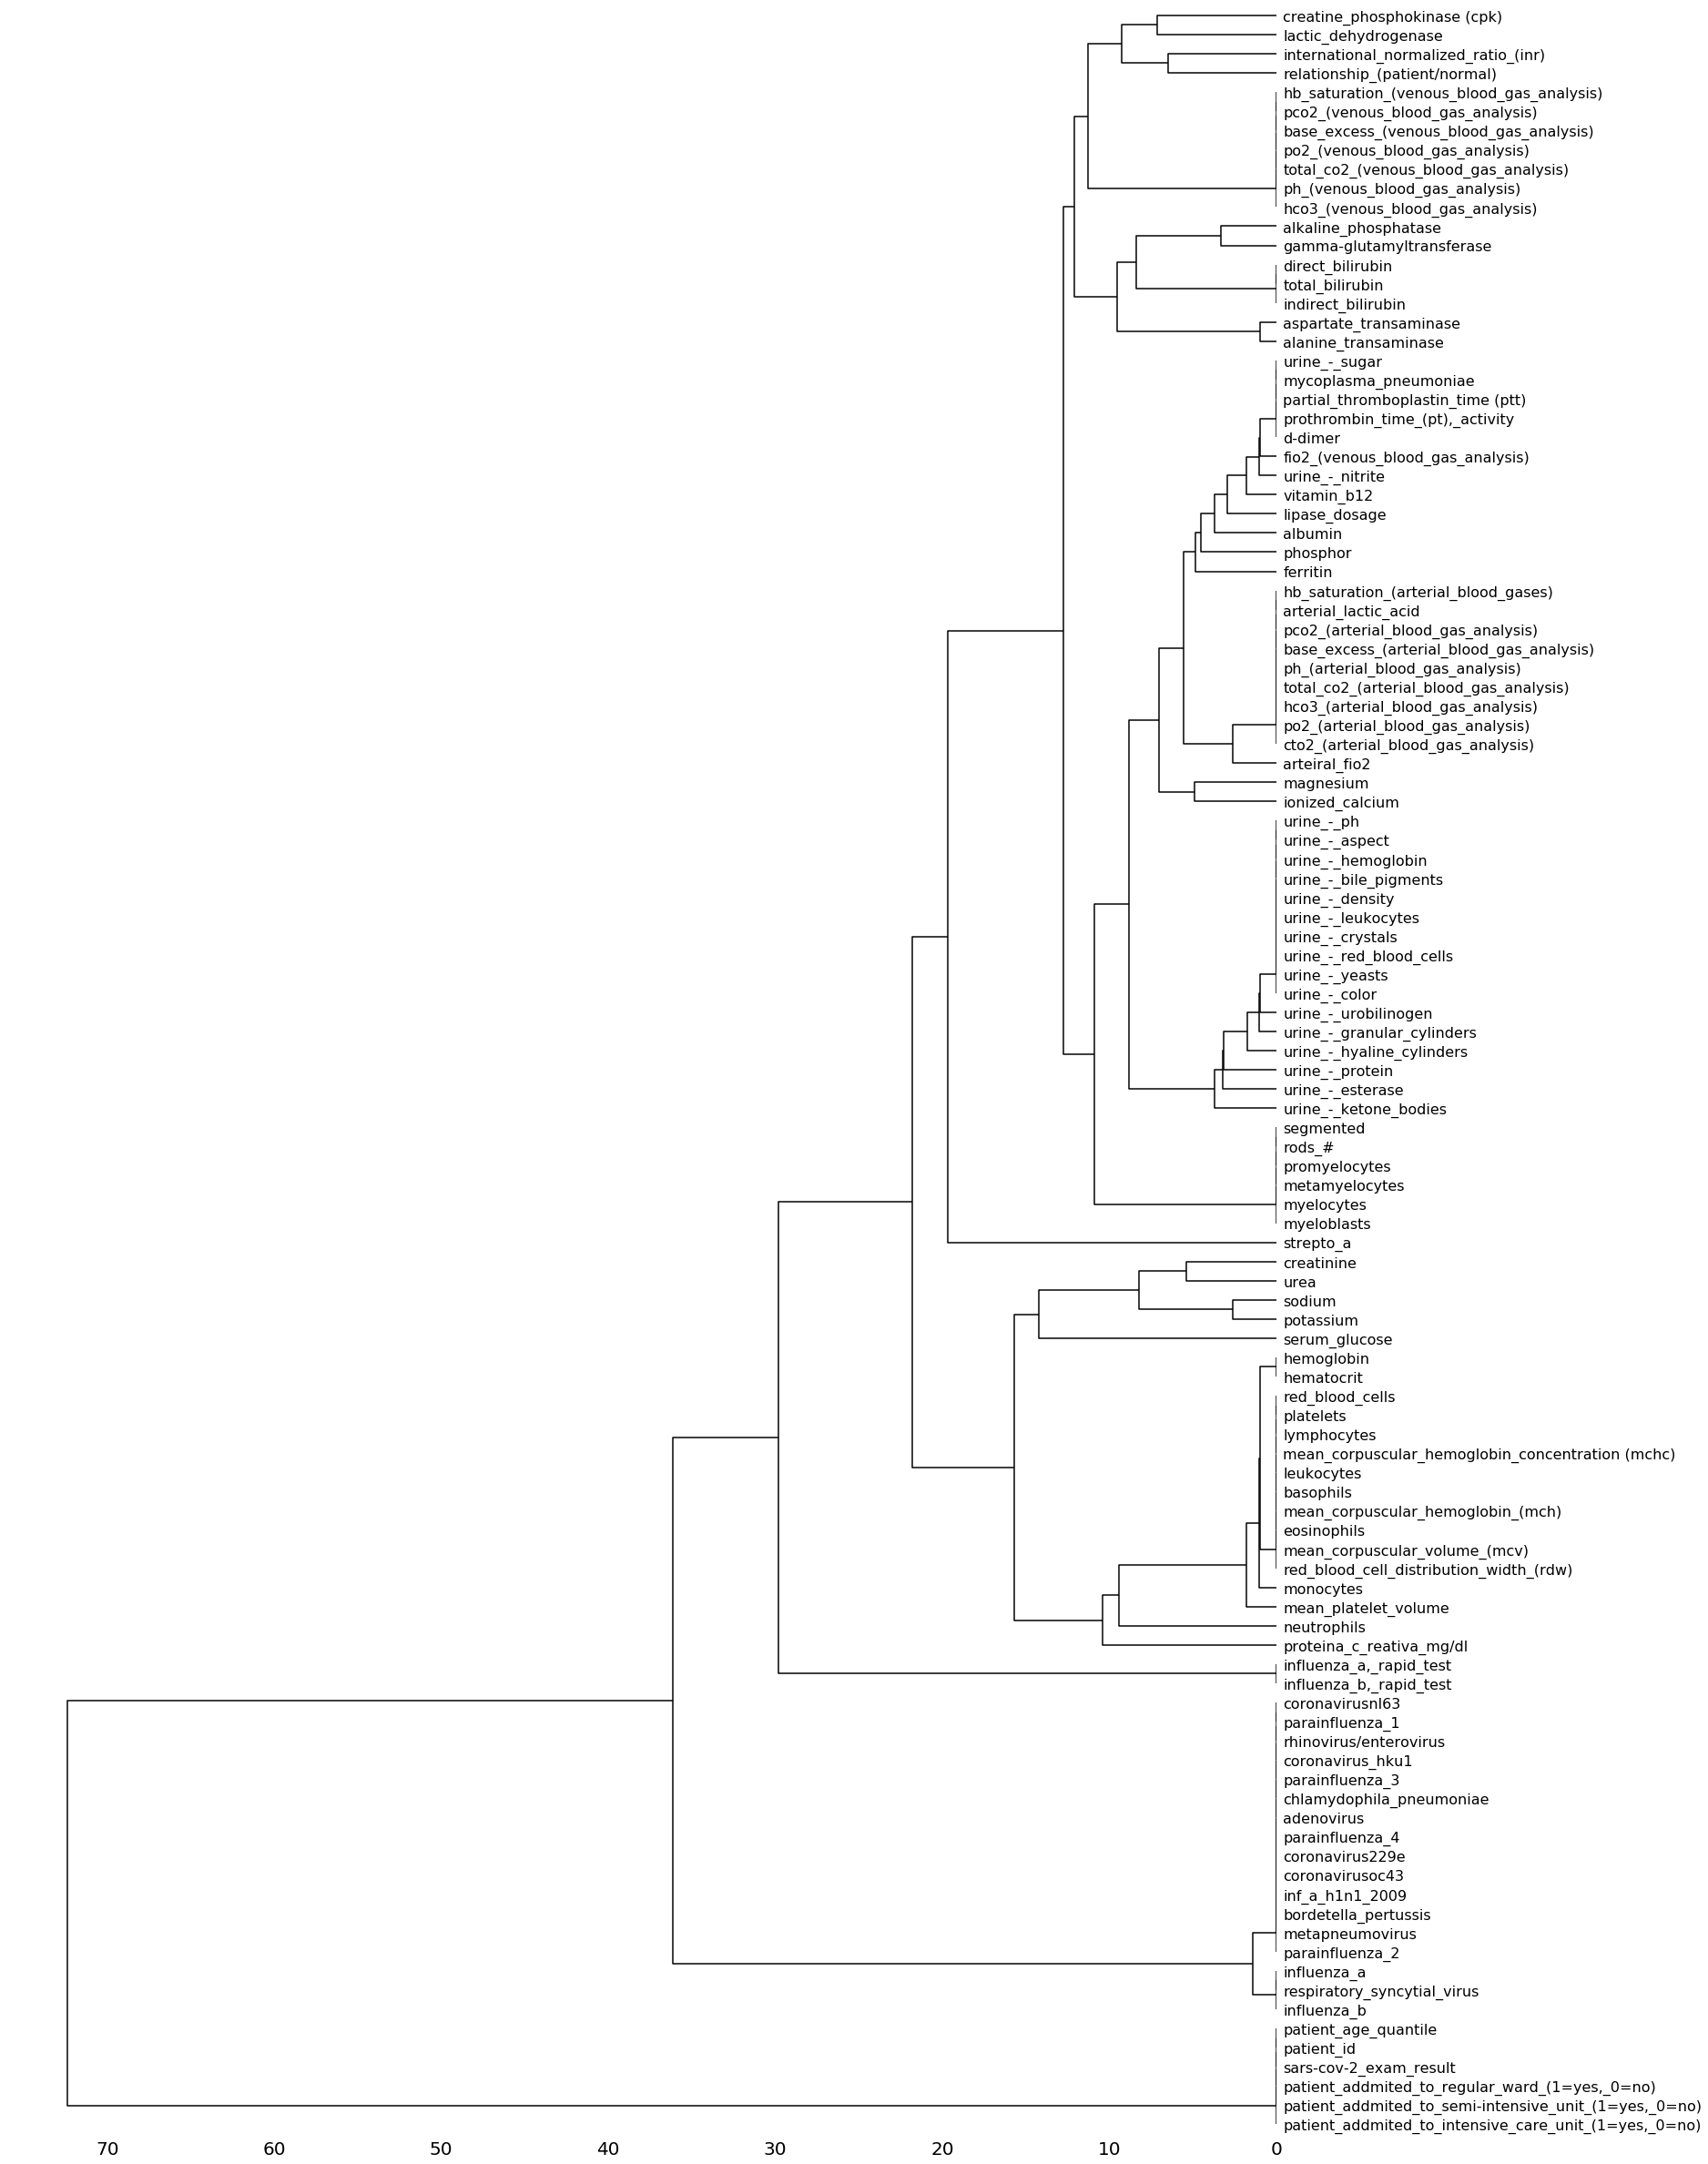

In [23]:
# Let's observe Dendrogram.The dendrogram allows you to more fully correlate variable completion, revealing trends deeper 
# than the pairwise ones visible in the correlation heatmap.

a2 = msno.dendrogram(dataset)
a2

In [24]:
# Number of each type of column
dataset.dtypes.value_counts()

float64    70
object     36
int64       5
dtype: int64

In [25]:
# Number of unique classes in each object column
dataset.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

patient_id                     5644
respiratory_syncytial_virus       2
influenza_a                       2
influenza_b                       2
parainfluenza_1                   2
coronavirusnl63                   2
rhinovirus/enterovirus            2
coronavirus_hku1                  2
parainfluenza_3                   2
chlamydophila_pneumoniae          2
adenovirus                        2
parainfluenza_4                   2
coronavirus229e                   2
coronavirusoc43                   2
inf_a_h1n1_2009                   2
bordetella_pertussis              2
metapneumovirus                   2
parainfluenza_2                   1
influenza_b,_rapid_test           2
influenza_a,_rapid_test           2
strepto_a                         3
urine_-_esterase                  2
urine_-_aspect                    4
urine_-_ph                       15
urine_-_hemoglobin                3
urine_-_bile_pigments             2
urine_-_ketone_bodies             2
urine_-_nitrite             

In [26]:
# Find correlations with the target and sort
correlations = dataset.corr()['sars-cov-2_exam_result'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 lipase_dosage                         0.191942
monocytes                             0.197333
cto2_(arterial_blood_gas_analysis)    0.267457
po2_(arterial_blood_gas_analysis)     0.312537
ph_(arterial_blood_gas_analysis)      0.314820
sars-cov-2_exam_result                1.000000
mycoplasma_pneumoniae                      NaN
fio2_(venous_blood_gas_analysis)           NaN
myeloblasts                                NaN
urine_-_sugar                              NaN
partial_thromboplastin_time (ptt)          NaN
prothrombin_time_(pt),_activity            NaN
vitamin_b12                                NaN
d-dimer                                    NaN
albumin                                    NaN
Name: sars-cov-2_exam_result, dtype: float64

Most Negative Correlations:
 pco2_(arterial_blood_gas_analysis)        -0.323977
arteiral_fio2                             -0.310583
ionized_calcium                           -0.305113
leukocytes                         

In [27]:
features = dataset.columns.values[2:112]
corrs_ = dataset[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs_ = corrs_[corrs_['level_0'] != corrs_['level_1']]
corrs_.head(10)

,level_0,level_1,0
0,hco3_(arterial_blood_gas_analysis),promyelocytes,0.000000e+00
1,promyelocytes,base_excess_(arterial_blood_gas_analysis),0.000000e+00
2,promyelocytes,po2_(arterial_blood_gas_analysis),0.000000e+00
3,promyelocytes,hco3_(arterial_blood_gas_analysis),0.000000e+00
4,po2_(arterial_blood_gas_analysis),promyelocytes,0.000000e+00
5,base_excess_(arterial_blood_gas_analysis),promyelocytes,0.000000e+00
6,promyelocytes,alkaline_phosphatase,6.932775e-18
7,alkaline_phosphatase,promyelocytes,6.932775e-18
8,promyelocytes,indirect_bilirubin,1.218817e-17
9,indirect_bilirubin,promyelocytes,1.218817e-17


In [28]:
#Let's see the least correlated features.
corrs_.head(10)

,level_0,level_1,0
0,hco3_(arterial_blood_gas_analysis),promyelocytes,0.000000e+00
1,promyelocytes,base_excess_(arterial_blood_gas_analysis),0.000000e+00
2,promyelocytes,po2_(arterial_blood_gas_analysis),0.000000e+00
3,promyelocytes,hco3_(arterial_blood_gas_analysis),0.000000e+00
4,po2_(arterial_blood_gas_analysis),promyelocytes,0.000000e+00
5,base_excess_(arterial_blood_gas_analysis),promyelocytes,0.000000e+00
6,promyelocytes,alkaline_phosphatase,6.932775e-18
7,alkaline_phosphatase,promyelocytes,6.932775e-18
8,promyelocytes,indirect_bilirubin,1.218817e-17
9,indirect_bilirubin,promyelocytes,1.218817e-17


In [29]:
#Let's look to the top most correlated features, besides the same feature pairs.
corrs_.tail(10)

,level_0,level_1,0
5466,cto2_(arterial_blood_gas_analysis),fio2_(venous_blood_gas_analysis),NaN
5467,cto2_(arterial_blood_gas_analysis),myeloblasts,NaN
5468,cto2_(arterial_blood_gas_analysis),urine_-_sugar,NaN
5469,cto2_(arterial_blood_gas_analysis),partial_thromboplastin_time (ptt),NaN
5470,cto2_(arterial_blood_gas_analysis),"prothrombin_time_(pt),_activity",NaN
5471,cto2_(arterial_blood_gas_analysis),vitamin_b12,NaN
5472,cto2_(arterial_blood_gas_analysis),ferritin,NaN
5473,cto2_(arterial_blood_gas_analysis),lipase_dosage,NaN
5474,cto2_(arterial_blood_gas_analysis),d-dimer,NaN
5475,cto2_(arterial_blood_gas_analysis),albumin,NaN


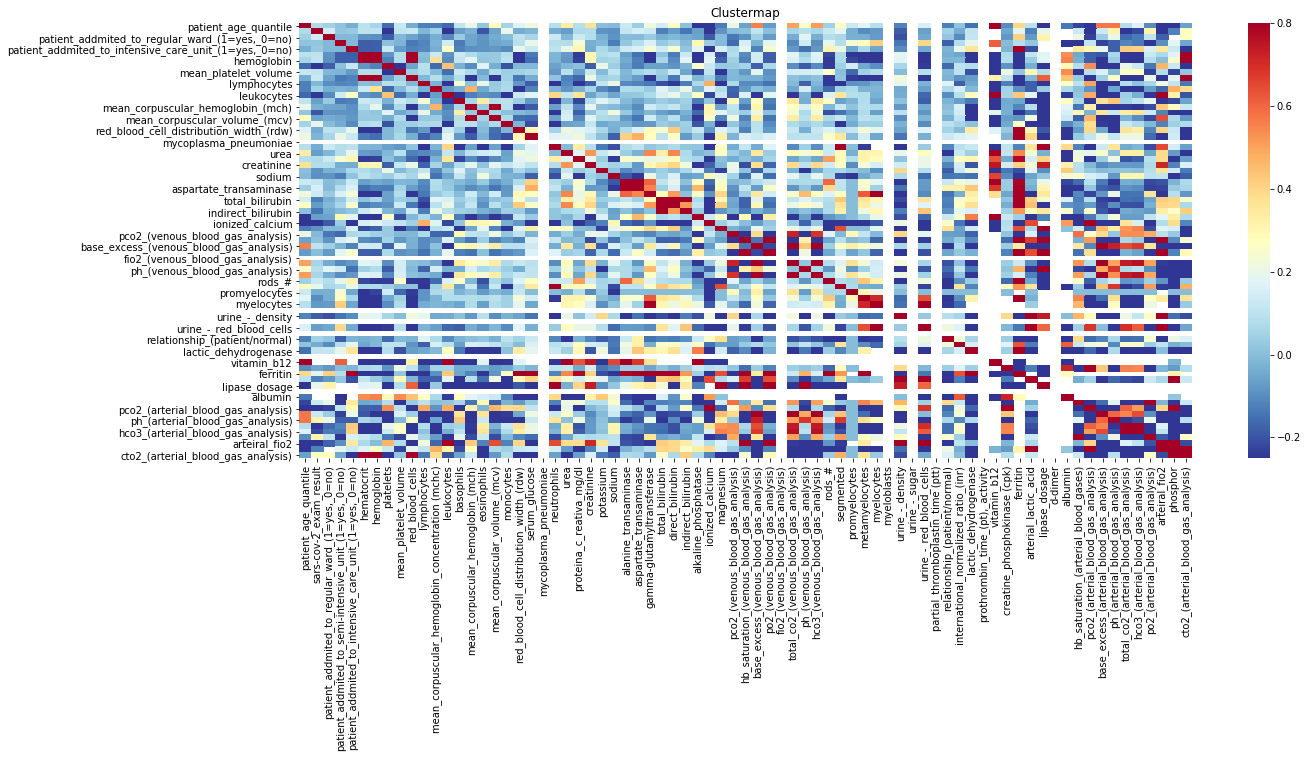

In [30]:
# Now let's check correlations clustermap
corrs = dataset.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = False, vmax = 0.8)
plt.title('Clustermap');

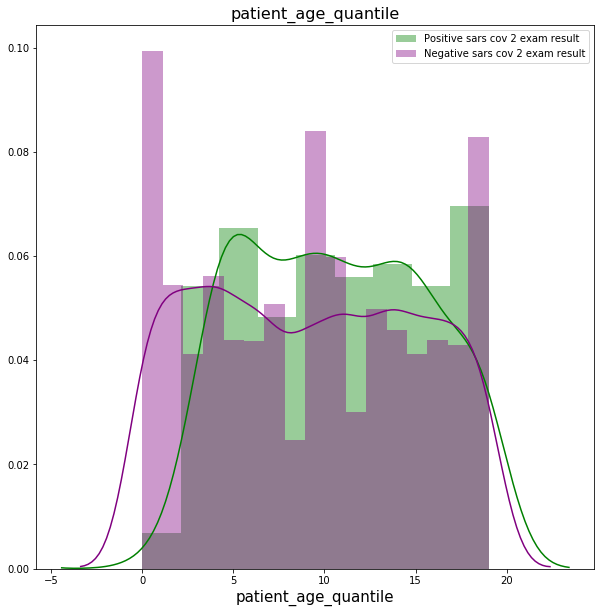

In [31]:
# Patient age quantile by sars cov2 exam result
def plot_dist_col(column):
    pos__df = dataset[dataset['sars-cov-2_exam_result'] ==1]
    neg__df = dataset[dataset['sars-cov-2_exam_result'] ==0]

    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(pos__df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(neg__df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['Positive sars cov 2 exam result', 'Negative sars cov 2 exam result'])
    plt.show()
plot_dist_col('patient_age_quantile')

In [32]:
fig = px.pie( values=dataset.groupby(['sars-cov-2_exam_result']).size().values,names=dataset.groupby(['sars-cov-2_exam_result']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#FEE000" ) )   
py.iplot(fig)

In [33]:
#fill in mean for floats
for c in dataset.columns:
    if dataset[c].dtype=='float16' or  dataset[c].dtype=='float32' or  dataset[c].dtype=='float64':
        dataset[c].fillna(dataset[c].mean())

#fill in -999 for categoricals
dataset = dataset.fillna(-999)
# Label Encoding
for f in dataset.columns:
    if dataset[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(dataset[f].values))
        dataset[f] = lbl.transform(list(dataset[f].values))
        
print('Labelling done.')    

Labelling done.


In [34]:
# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = dataset.corr().abs()
corr_matrix.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,mean_corpuscular_hemoglobin_(mch),eosinophils,mean_corpuscular_volume_(mcv),monocytes,red_blood_cell_distribution_width_(rdw),serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus/enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg/dl,creatinine,potassium,sodium,"influenza_b,_rapid_test","influenza_a,_rapid_test",alanine_transaminase,aspartate_transaminase,gamma-glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),fio2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),rods_#,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_-_esterase,urine_-_aspect,urine_-_ph,urine_-_hemoglobin,urine_-_bile_pigments,urine_-_ketone_bodies,urine_-_nitrite,urine_-_density,urine_-_urobilinogen,urine_-_protein,urine_-_sugar,urine_-_leukocytes,urine_-_crystals,urine_-_red_blood_cells,urine_-_hyaline_cylinders,urine_-_granular_cylinders,urine_-_yeasts,urine_-_color,partial_thromboplastin_time (ptt),relationship_(patient/normal),international_normalized_ratio_(inr),lactic_dehydrogenase,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_id,1.000000,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,0.001993,0.001987,0.001965,0.001963,0.001982,0.001986,0.001994,0.001997,0.002886,0.001990,0.003019,0.003093,0.003210,0.004073,0.004184,0.001755,0.008048,NaN,0.003829,0.005378,0.004730,0.003409,0.004724,0.003164,0.003991,0.006590,0.004026,0.004800,0.004472,0.000498,0.003959,0.000623,0.006083,0.002802,0.001500,0.015878,0.018408,0.003397,0.004314,0.003070,0.018474,0.018485,0.018470,0.002834,0.015135,0.017803,0.005460,0.011408,0.011389,0.011402,0.011383,0.012268,0.011407,0.011392,0.011407,0.007207,0.007222,0.007189,0.007210,0.007201,0.007206,0.014501,0.016011,0.017005,0.013409,0.017971,0.008254,0.004555,0.018895,0.015596,0.018324,NaN,0.018100,0.019843,0.018904,0.020732,0.021325,0.018901,0.018446,NaN,0.001224,0.009923,0.011182,NaN,0.002073,0.004570,0.010426,0.002842,0.010422,NaN,0.005787,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
patient_age_quantile,0.014136,1.000000,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,0.109901,0.109871,0.109871,0.109857,0.109951,0.109981,0.109921,0.110010,0.110938,0.109971,0.086764,0.004644,0.018124,0.010242,0.017652,0.018663,0.001011,NaN,0.018832,0.018431,0.017502,0.013473,0.014038,0.017466,0.017221,0.011411,0.016905,0.016024,0.017278,0.128227,0.112175,0.108975,0.116449,0.109506,0.110053,0.130636,0.133817,0.066391,0.066337,0.047117,0.084755,0.084779,0.084729,0.046623,0.031407,0.141642,0.056384,0.068172,0.068125,0.068235,0.068123,0.020004,0.068225,0.068181,0.068227,0.007516,0.007478,0.007503,0.007495,0

In [35]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,patient_id,patient_age_quantile,sars-cov-2_exam_result,"patient_addmited_to_regular_ward_(1=yes,_0=no)","patient_addmited_to_semi-intensive_unit_(1=yes,_0=no)","patient_addmited_to_intensive_care_unit_(1=yes,_0=no)",hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration (mchc),leukocytes,basophils,mean_corpuscular_hemoglobin_(mch),eosinophils,mean_corpuscular_volume_(mcv),monocytes,red_blood_cell_distribution_width_(rdw),serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus/enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg/dl,creatinine,potassium,sodium,"influenza_b,_rapid_test","influenza_a,_rapid_test",alanine_transaminase,aspartate_transaminase,gamma-glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_(venous_blood_gas_analysis),hb_saturation_(venous_blood_gas_analysis),base_excess_(venous_blood_gas_analysis),po2_(venous_blood_gas_analysis),fio2_(venous_blood_gas_analysis),total_co2_(venous_blood_gas_analysis),ph_(venous_blood_gas_analysis),hco3_(venous_blood_gas_analysis),rods_#,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_-_esterase,urine_-_aspect,urine_-_ph,urine_-_hemoglobin,urine_-_bile_pigments,urine_-_ketone_bodies,urine_-_nitrite,urine_-_density,urine_-_urobilinogen,urine_-_protein,urine_-_sugar,urine_-_leukocytes,urine_-_crystals,urine_-_red_blood_cells,urine_-_hyaline_cylinders,urine_-_granular_cylinders,urine_-_yeasts,urine_-_color,partial_thromboplastin_time (ptt),relationship_(patient/normal),international_normalized_ratio_(inr),lactic_dehydrogenase,"prothrombin_time_(pt),_activity",vitamin_b12,creatine_phosphokinase (cpk),ferritin,arterial_lactic_acid,lipase_dosage,d-dimer,albumin,hb_saturation_(arterial_blood_gases),pco2_(arterial_blood_gas_analysis),base_excess_(arterial_blood_gas_analysis),ph_(arterial_blood_gas_analysis),total_co2_(arterial_blood_gas_analysis),hco3_(arterial_blood_gas_analysis),po2_(arterial_blood_gas_analysis),arteiral_fio2,phosphor,cto2_(arterial_blood_gas_analysis)
patient_id,NaN,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,0.001993,0.001987,0.001965,0.001963,0.001982,0.001986,0.001994,0.001997,0.002886,0.001990,0.003019,0.003093,0.003210,0.004073,0.004184,0.001755,0.008048,NaN,0.003829,0.005378,0.004730,0.003409,0.004724,0.003164,0.003991,0.006590,0.004026,0.004800,0.004472,0.000498,0.003959,0.000623,0.006083,0.002802,0.001500,0.015878,0.018408,0.003397,0.004314,0.003070,0.018474,0.018485,0.018470,0.002834,0.015135,0.017803,0.005460,0.011408,0.011389,0.011402,0.011383,0.012268,0.011407,0.011392,0.011407,0.007207,0.007222,0.007189,0.007210,0.007201,0.007206,0.014501,0.016011,0.017005,0.013409,0.017971,0.008254,0.004555,0.018895,0.015596,0.018324,NaN,0.018100,0.019843,0.018904,0.020732,0.021325,0.018901,0.018446,NaN,0.001224,0.009923,0.011182,NaN,0.002073,0.004570,0.010426,0.002842,0.010422,NaN,0.005787,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
patient_age_quantile,NaN,NaN,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,0.109901,0.109871,0.109871,0.109857,0.109951,0.109981,0.109921,0.110010,0.110938,0.109971,0.086764,0.004644,0.018124,0.010242,0.017652,0.018663,0.001011,NaN,0.018832,0.018431,0.017502,0.013473,0.014038,0.017466,0.017221,0.011411,0.016905,0.016024,0.017278,0.128227,0.112175,0.108975,0.116449,0.109506,0.110053,0.130636,0.133817,0.066391,0.066337,0.047117,0.084755,0.084779,0.084729,0.046623,0.031407,0.141642,0.056384,0.068172,0.068125,0.068235,0.068123,0.020004,0.068225,0.068181,0.068227,0.007516,0.007478,0.007503,0.007495,0.007509,0.00752

In [36]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = dataset.drop(columns = to_drop)
print('Data shape: ', dataset.shape)
print('Size of the data', dataset.shape)

There are 64 columns to remove.
Data shape:  (5644, 47)
Size of the data (5644, 47)


In [37]:
# Applying this on the entire dataset results in 64 collinear features removed.
to_drop

['hemoglobin',
 'platelets',
 'mean_platelet_volume',
 'red_blood_cells',
 'lymphocytes',
 'mean_corpuscular_hemoglobin_concentration\xa0(mchc)',
 'leukocytes',
 'basophils',
 'mean_corpuscular_hemoglobin_(mch)',
 'eosinophils',
 'mean_corpuscular_volume_(mcv)',
 'monocytes',
 'red_blood_cell_distribution_width_(rdw)',
 'influenza_a',
 'influenza_b',
 'parainfluenza_1',
 'coronavirusnl63',
 'rhinovirus/enterovirus',
 'coronavirus_hku1',
 'parainfluenza_3',
 'chlamydophila_pneumoniae',
 'adenovirus',
 'parainfluenza_4',
 'coronavirus229e',
 'coronavirusoc43',
 'inf_a_h1n1_2009',
 'bordetella_pertussis',
 'metapneumovirus',
 'parainfluenza_2',
 'creatinine',
 'sodium',
 'influenza_a,_rapid_test',
 'aspartate_transaminase',
 'direct_bilirubin',
 'indirect_bilirubin',
 'alkaline_phosphatase',
 'hb_saturation_(venous_blood_gas_analysis)',
 'base_excess_(venous_blood_gas_analysis)',
 'po2_(venous_blood_gas_analysis)',
 'total_co2_(venous_blood_gas_analysis)',
 'ph_(venous_blood_gas_analysis)

In [38]:
# Dataset missing values (in percent)
dataset_missing = (dataset.isnull().sum() / len(dataset)).sort_values(ascending = False)
dataset_missing.head()

phosphor           0.0
urea               0.0
magnesium          0.0
strepto_a          0.0
ionized_calcium    0.0
dtype: float64

In [39]:
# Identify missing values above threshold
dataset_missing_ = dataset_missing.index[dataset_missing > 0.85]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 85%% missing values' % len(all_missing))
dataset = dataset.drop(columns = all_missing)
print('Data shape: ', dataset.shape)

There are 0 columns with more than 85% missing values
Data shape:  (5644, 47)


In [40]:
cat_features = [i for i in dataset.columns if str(dataset[i].dtype) in ['object', 'category']]

if len(cat_features) > 0:
    dataset[cat_features] = dataset[cat_features].astype('category')


df_lgb = dataset.copy()
for i in cat_features:
    df_lgb[i] = dataset[i].cat.codes

df_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_lgb.columns]

dataset_labels = df_lgb['sars_cov_2_exam_result']
df_lgb_ = df_lgb.copy()
df_lgb = df_lgb.drop(['patient_id', 
                 'sars_cov_2_exam_result', 
                 'patient_addmited_to_regular_ward__1_yes__0_no_', 
                 'patient_addmited_to_semi_intensive_unit__1_yes__0_no_', 
                 'patient_addmited_to_intensive_care_unit__1_yes__0_no_'
                ], axis=1)
x = df_lgb.copy()

In [41]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(df_lgb.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 5000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):
    # Split into training and validation set
    dataset_features, valid_features, dataset_features_y, valid_y = train_test_split(x, dataset_labels, test_size = 0.20, random_state = i)
    
    # Train using early stopping
    model.fit(dataset_features, dataset_features_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.650087	valid_0's binary_logloss: 0.606586
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.625359	valid_0's binary_logloss: 0.681163


In [42]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(df_lgb.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head()

,feature,importance
0,patient_age_quantile,283.0
3,respiratory_syncytial_virus,34.0
7,proteina_c_reativa_mg_dl,30.0
9,influenza_b__rapid_test,26.5
1,hematocrit,24.0


In [43]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 21 features with 0.0 importance


,feature,importance
17,fio2__venous_blood_gas_analysis_,0.0
15,magnesium,0.0
13,ionized_calcium,0.0
4,mycoplasma_pneumoniae,0.0
41,phosphor,0.0


In [44]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

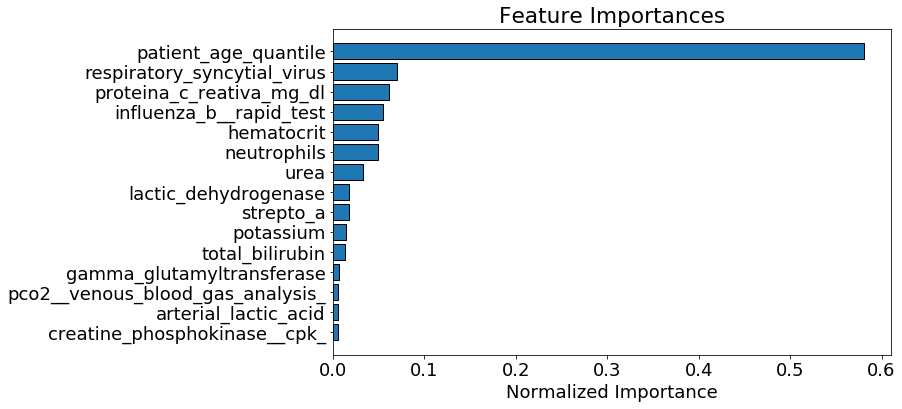

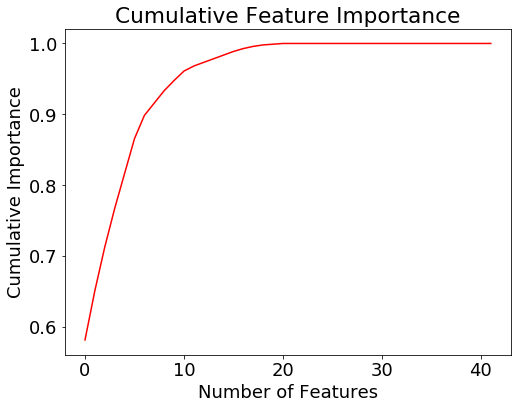

8 features required for 0.90 of cumulative importance


In [45]:
norm_feature_importances = plot_feature_importances(feature_importances)


In [46]:
#Let's remove the features that have zero importance.
df_lgb = df_lgb.drop(columns = zero_features)
print('Dataset shape: ', df_lgb.shape)

Dataset shape:  (5644, 21)


In [47]:
def identify_zero_importance_features(train, train_labels, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    train : dataframe
        Training features
        
    train_labels : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
     # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'auc', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [48]:
second_round_zero_features, feature_importances = identify_zero_importance_features(df_lgb, dataset_labels)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's auc: 0.645867	valid_0's binary_logloss: 0.611304
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[17]	valid_0's auc: 0.641129	valid_0's binary_logloss: 0.64545

There are 1 features with 0.0 importance


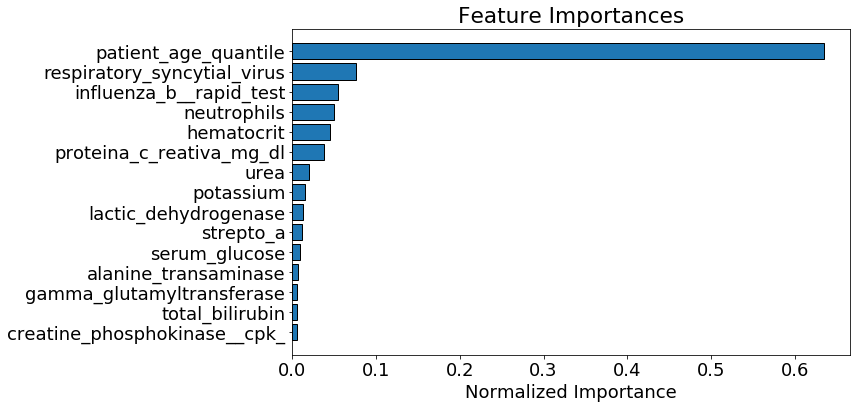

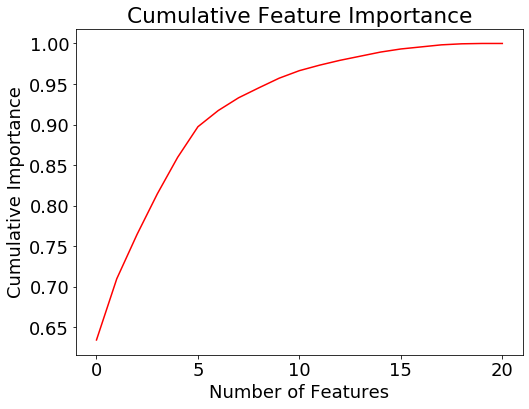

10 features required for 0.95 of cumulative importance


In [49]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

In [50]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])
features_to_keep.append('patient_addmited_to_intensive_care_unit__1_yes__0_no_')
features_to_keep.append( 'patient_addmited_to_regular_ward__1_yes__0_no_')
features_to_keep.append( 'patient_addmited_to_semi_intensive_unit__1_yes__0_no_')
features_to_keep.append( 'patient_id')
features_to_keep.append( 'sars_cov_2_exam_result')
                        
# Create new datasets with smaller features
dataset_small = df_lgb_[features_to_keep]
    

In [51]:
!pip install shap

In [52]:
import shap
%time shap_values = shap.TreeExplainer(model).shap_values(valid_features)
print(shap_values[0].shape)

Wall time: 239 ms
(1129, 42)


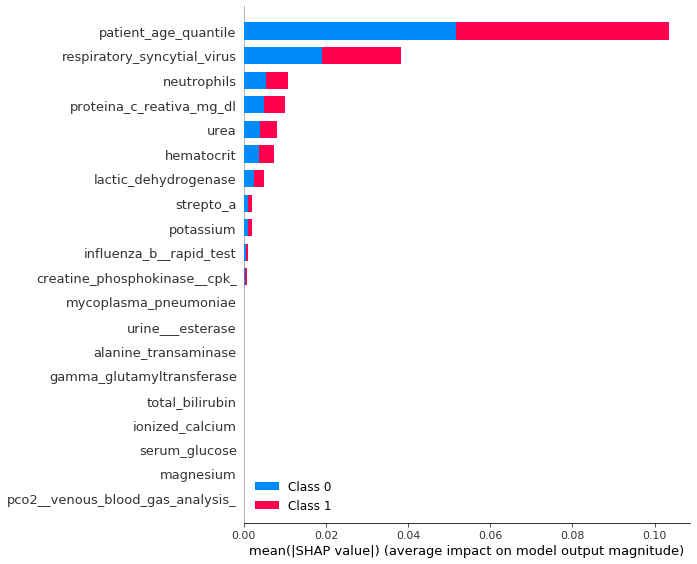

Wall time: 453 ms


In [53]:
%time shap.summary_plot(shap_values, valid_features)

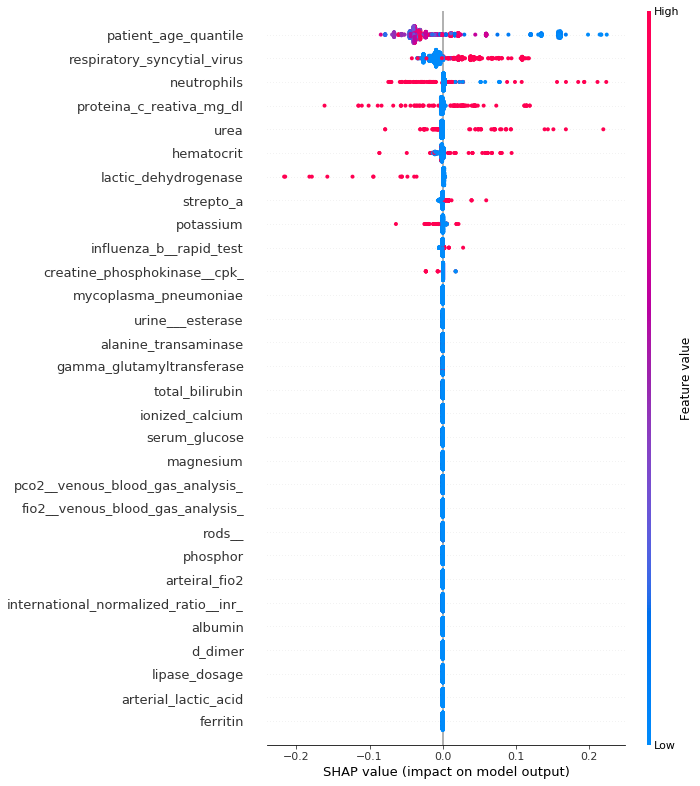

In [54]:
# Let's summarize the effects of top features
shap.summary_plot(shap_values[0], valid_features, max_display=30)    

Total columns to display: 42


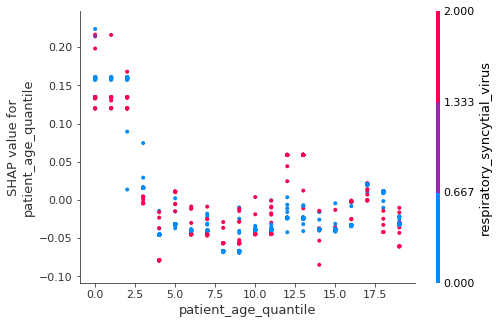

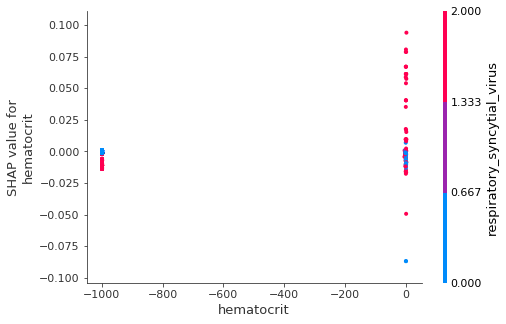

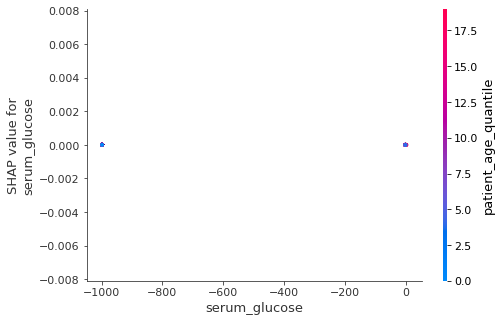

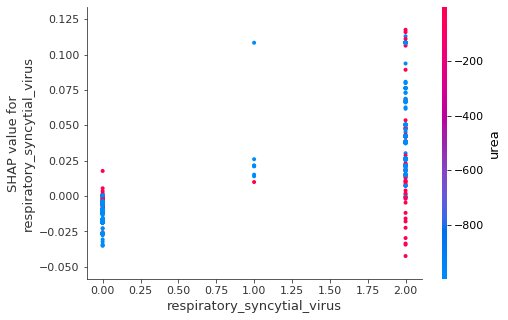

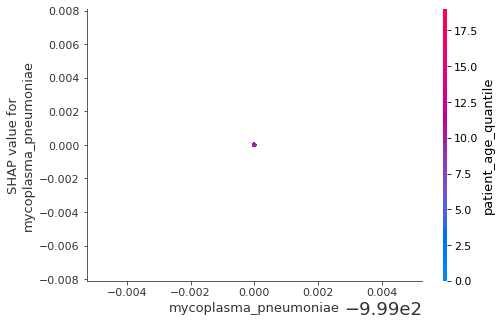

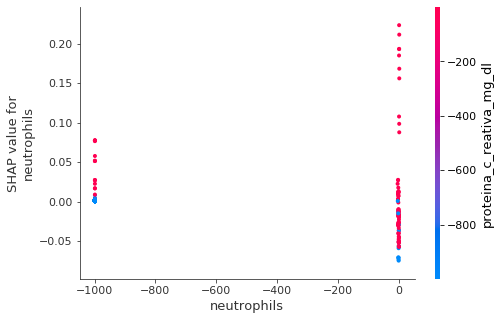

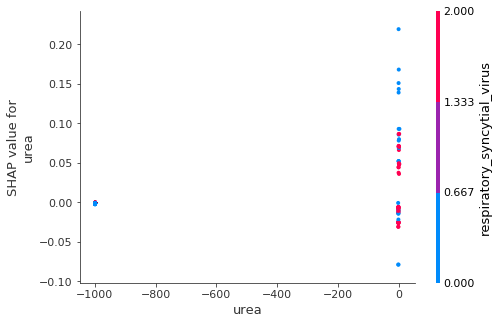

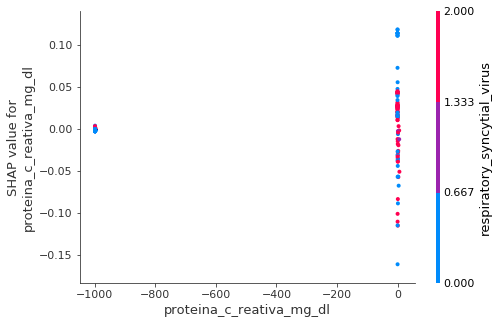

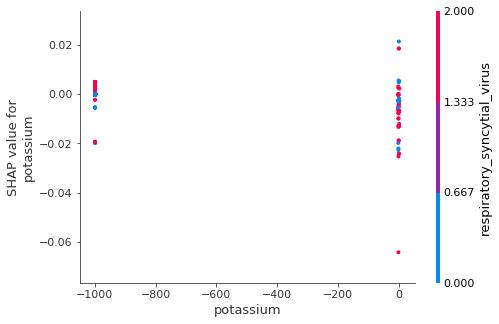

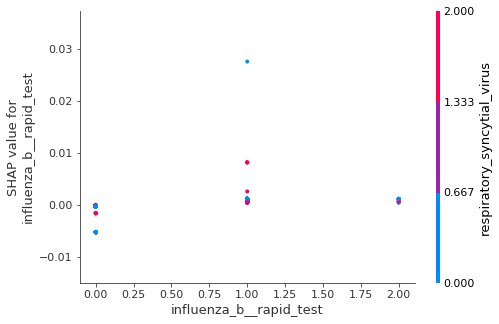

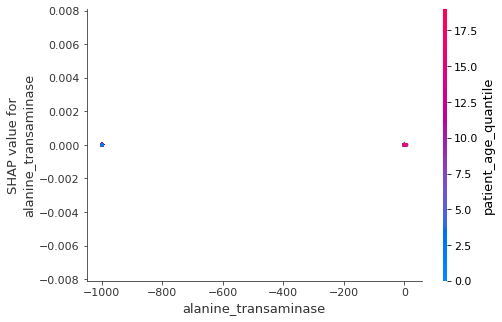

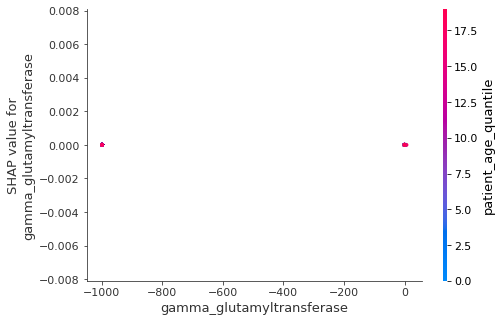

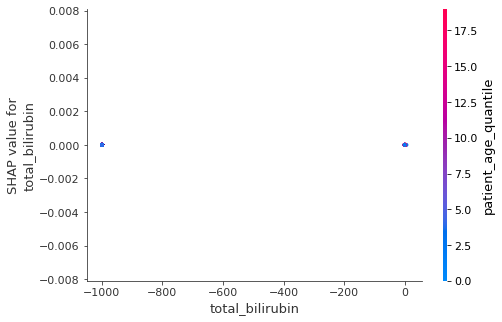

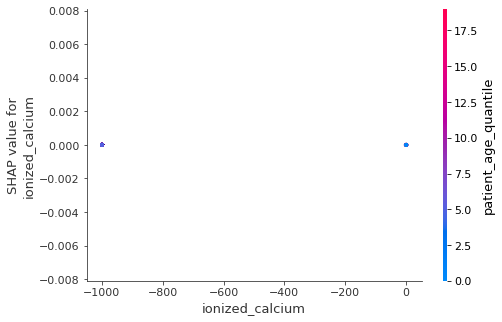

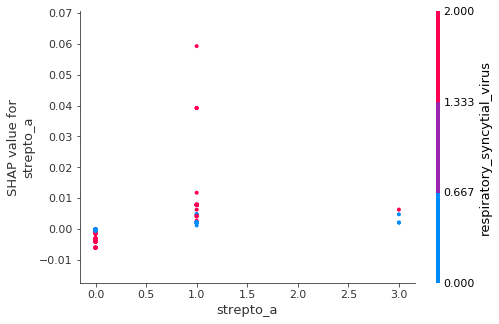

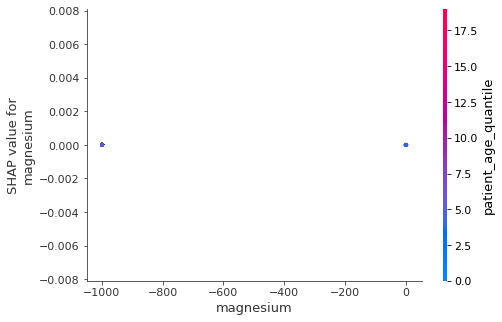

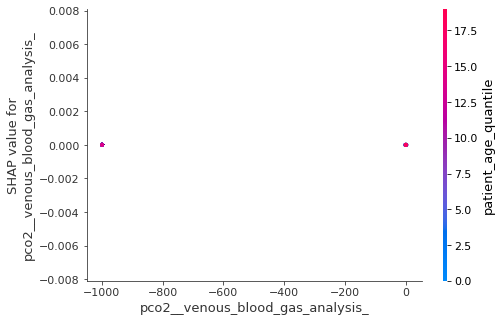

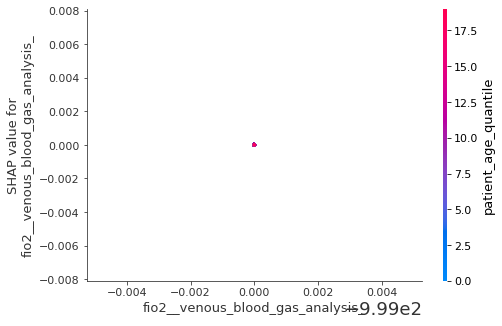

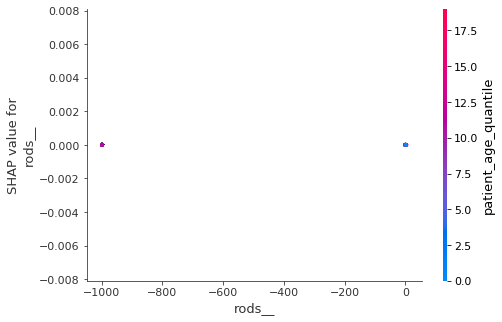

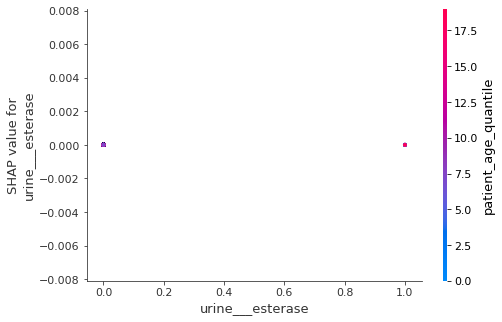

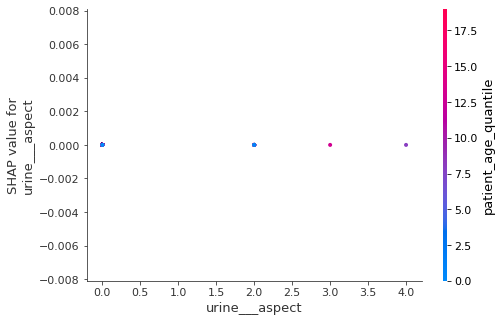

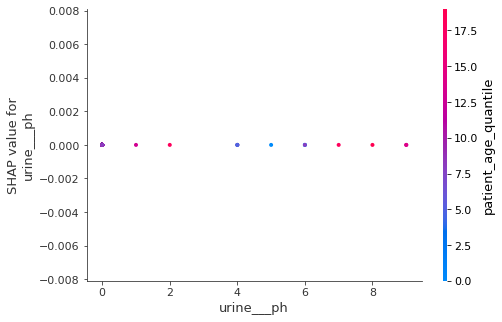

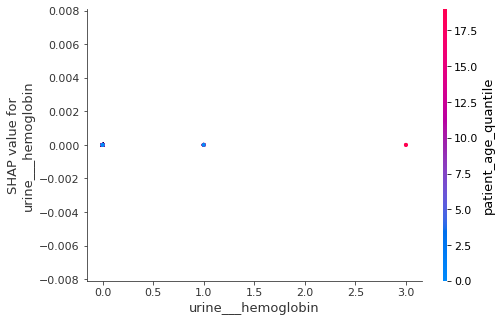

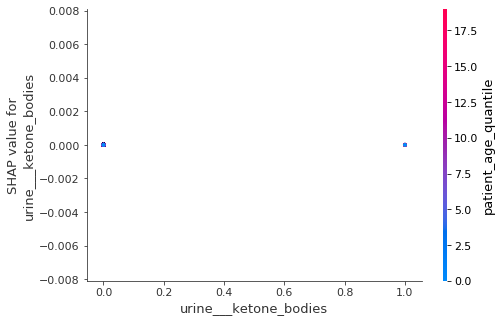

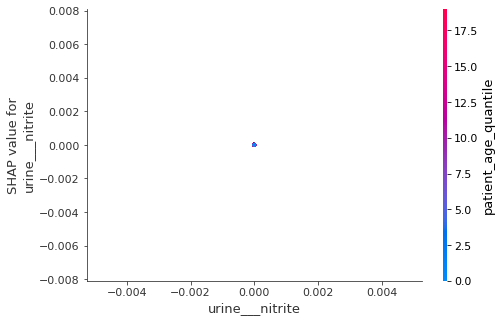

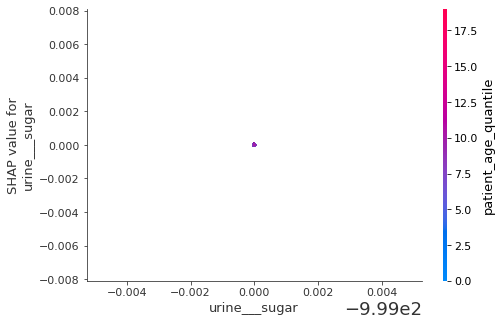

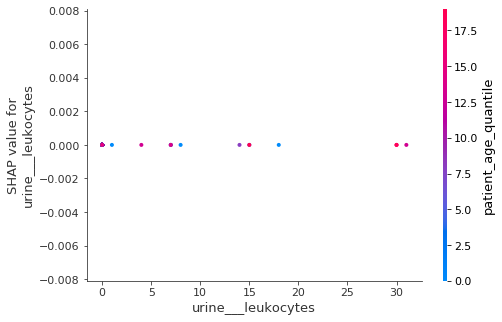

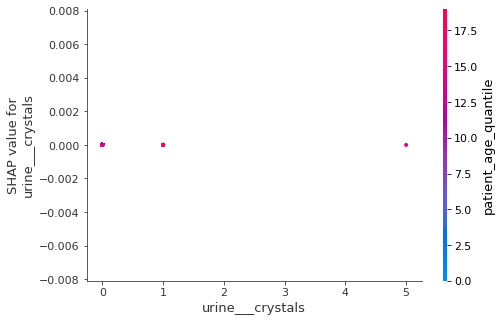

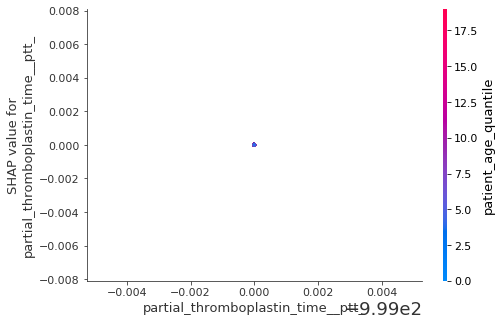

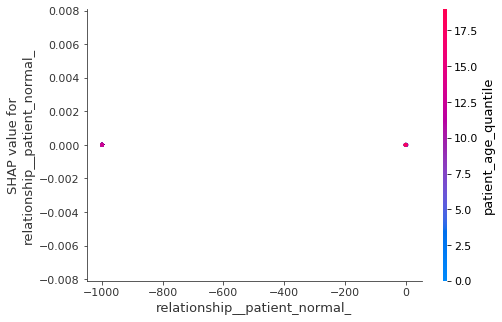

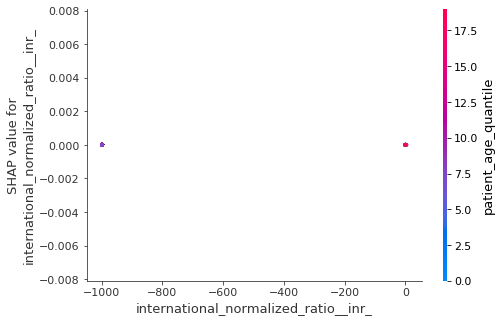

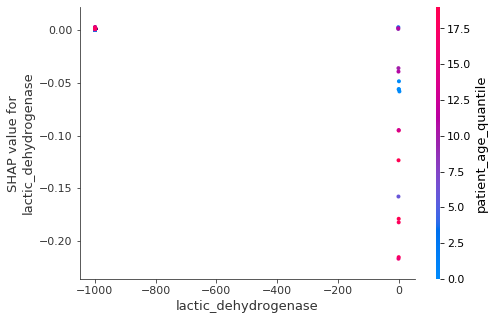

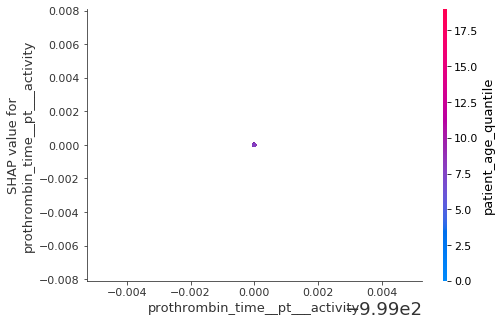

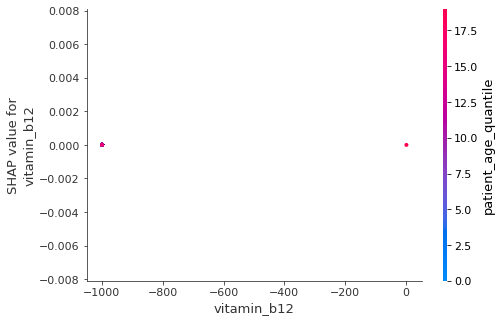

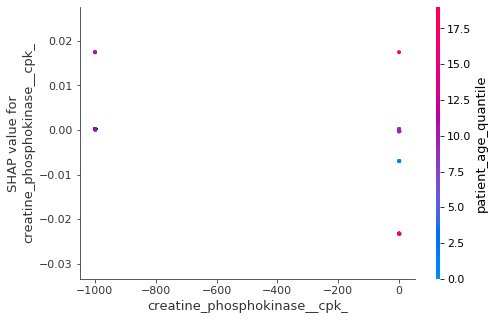

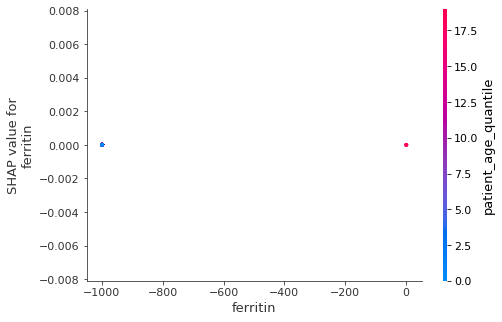

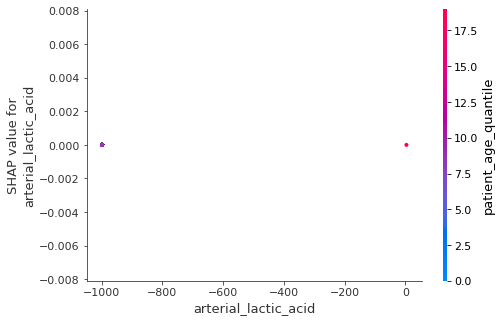

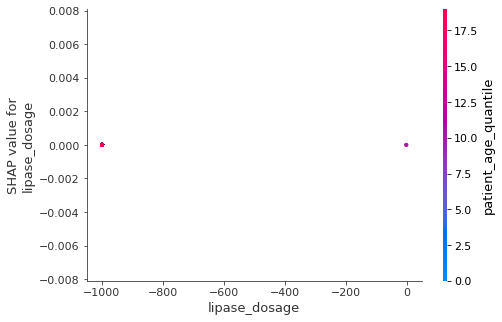

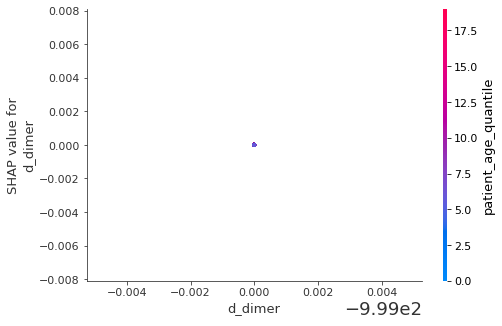

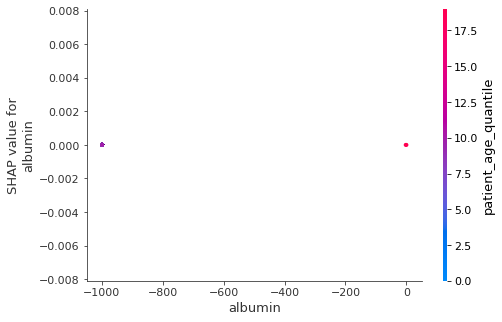

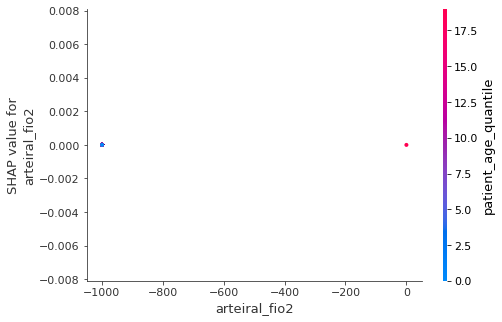

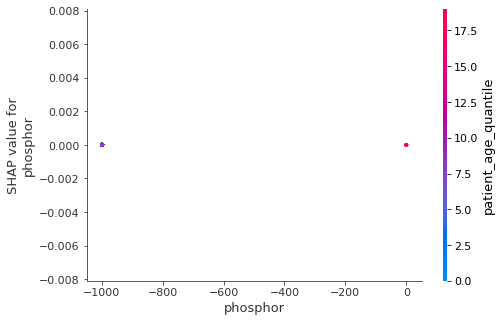

In [55]:
print("Total columns to display:", len(valid_features.columns))
for i in valid_features.columns:
    shap.dependence_plot(i, shap_values[0], valid_features)
    plt.show()


In [56]:
train_df = dataset_small
features = list(train_df)
features.remove( 'patient_id')
features.remove( 'sars_cov_2_exam_result')
features.remove( 'patient_addmited_to_intensive_care_unit__1_yes__0_no_')
features.remove( 'patient_addmited_to_regular_ward__1_yes__0_no_')
features.remove( 'patient_addmited_to_semi_intensive_unit__1_yes__0_no_')
target = 'sars_cov_2_exam_result'

In [57]:
# Confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix"',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [58]:
import itertools
from scipy import interp
def gradient_boosting_model(params, folds, model='LGB',stack = False):    
    print(str(model)+' modeling...')
    start_time = timer(None)
    plt.rcParams["axes.grid"] = True
    nfold = 5
    skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=2020)

    oof = np.zeros(len(train_df))
    mean_fpr = np.linspace(0,1,100)
    cms= []
    tprs = []
    aucs = []
    y_real = []
    y_proba = []
    recalls = []
    roc_aucs = []
    f1_scores = []
    accuracies = []
    precisions = []
    feature_importance_df = pd.DataFrame()

    i = 1
    for train_idx, valid_idx in skf.split(train_df, train_df['sars_cov_2_exam_result'].values):
        print("\nfold {}".format(i))
            
        if model == 'XGB':
            trn_data = xgb.DMatrix(train_df.iloc[train_idx][features], 
                                   label=train_df.iloc[train_idx][target].values)
            val_data = xgb.DMatrix(train_df.iloc[valid_idx][features], 
                                   label=train_df.iloc[valid_idx][target].values)
            
            watchlist = [(trn_data, 'train'), (val_data, 'valid')]

            clf = xgb.train(params, dtrain = trn_data, evals=watchlist, early_stopping_rounds=100, maximize=True, verbose_eval=100)
            oof[valid_idx] = clf.predict(val_data, ntree_limit=clf.best_ntree_limit)

            
            
            # Scores 
        roc_aucs.append(roc_auc_score(train_df.iloc[valid_idx][target].values, oof[valid_idx]))
        accuracies.append(accuracy_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        recalls.append(recall_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        precisions.append(precision_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        f1_scores.append(f1_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        
        
        # Roc curve by folds
        f = plt.figure(1)
        fpr, tpr, t = roc_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i,roc_auc))
        
        
         # Precion recall by folds
        g = plt.figure(2)
        precision, recall, _ = precision_recall_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        y_real.append(train_df.iloc[valid_idx][target].values)
        y_proba.append(oof[valid_idx])
        plt.plot(recall, precision, lw=2, alpha=0.3, label='P|R fold %d' % (i))  
        i= i+1
        
        
        # Confusion matrix by folds
        cms.append(confusion_matrix(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        
        
        # Metrics
    print(
            '\nCV roc score        : {0:.4f}, std: {1:.4f}.'.format(np.mean(roc_aucs), np.std(roc_aucs)),
            '\nCV accuracy score   : {0:.4f}, std: {1:.4f}.'.format(np.mean(accuracies), np.std(accuracies)),
            '\nCV recall score     : {0:.4f}, std: {1:.4f}.'.format(np.mean(recalls), np.std(recalls)),
            '\nCV precision score  : {0:.4f}, std: {1:.4f}.'.format(np.mean(precisions), np.std(precisions)),
            '\nCV f1 score         : {0:.4f}, std: {1:.4f}.'.format(np.mean(f1_scores), np.std(f1_scores))
    )
    
    
    # Roc plt
    f = plt.figure(1)
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'grey')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='blue',
             label=r'Mean ROC (AUC = %0.4f)' % (np.mean(roc_aucs)),lw=2, alpha=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(str(model)+' ROC curve by folds')
    plt.legend(loc="lower right")
    
    # PR plt
    g = plt.figure(2)
    plt.plot([0,1],[1,0],linestyle = '--',lw = 2,color = 'grey')
    y_real = np.concatenate(y_real)
    y_proba = np.concatenate(y_proba)
    precision, recall, _ = precision_recall_curve(y_real, y_proba)
    plt.plot(recall, precision, color='blue',
             label=r'Mean P|R')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(str(model)+' P|R curve by folds')
    plt.legend(loc="lower left")

    # Confusion maxtrix
    plt.rcParams["axes.grid"] = False
    cm = np.average(cms, axis=0)
    class_names = [0,1]
    plt.figure()
    plot_confusion_matrix(cm, 
                          classes=class_names, 
                          title= str(model).title()+' Confusion matrix [averaged/folds]')
    
    # Feat imp plt
    if model != 'XGB':
        cols = (feature_importance_df[["Feature", "importance"]]
            .groupby("Feature")
            .mean()
            .sort_values(by="importance", ascending=False)[:30].index)
        best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

        plt.figure(figsize=(10,10))
        sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False),
                edgecolor=('white'), linewidth=2, palette="rocket")
        plt.title(str(model)+' Features importance (averaged/folds)', fontsize=18)
        plt.tight_layout()
        
        
        # Timer end    
    timer(start_time)
    
#Timer
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('Time taken for Modeling: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


In [59]:
param_xgb = {
            'n_jobs' : -1, 'n_estimators' : 500, 'seed' : 1919,
            'random_state':2020, 'eval_metric':'auc' }

XGB modeling...

fold 1
[22:56:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.65796	valid-auc:0.59093
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 100 rounds.
[9]	train-auc:0.71251	valid-auc:0.65207

fold 2
[22:56:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open 

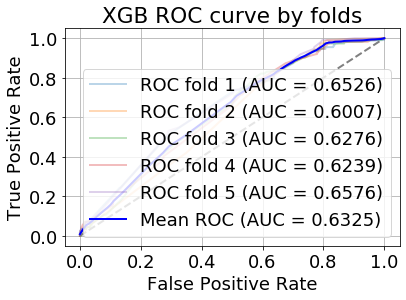

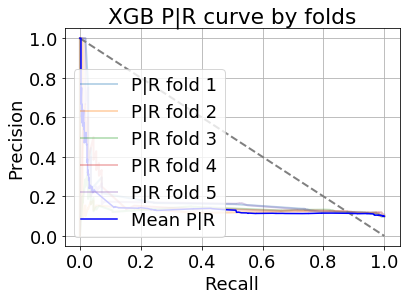

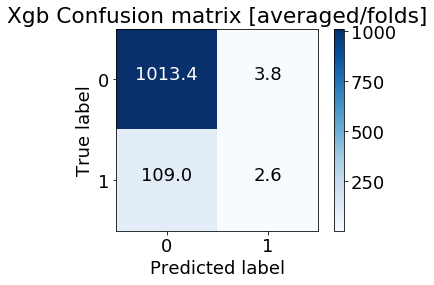

In [60]:
gradient_boosting_model(param_xgb, 5, 'XGB')

In [61]:
# Machine Learning
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [62]:
# Split Train and Validation
X_train = train_df.drop('patient_id',axis=1)
X_train = X_train.drop(['sars_cov_2_exam_result','patient_addmited_to_intensive_care_unit__1_yes__0_no_','patient_addmited_to_regular_ward__1_yes__0_no_','patient_addmited_to_semi_intensive_unit__1_yes__0_no_'],axis=1)
target = train_df['sars_cov_2_exam_result']

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  target,
                                                  test_size=0.30, 
                                                  random_state=2020, 
                                                  stratify=target)

In [63]:
# Level 1 are the base models that take the training dataset as input


l1_clf1 = LGBMRegressor(boosting_type='gbdt',
                        objective="binary",
                        metric="AUC",
                        boost_from_average="false",
                        learning_rate=0.0045,
                        num_leaves=491,
                        max_depth=20,
                        min_child_weight=0.035,
                        feature_fraction=0.38,
                        bagging_fraction=0.42,
                        min_data_in_leaf=100,
                        max_bin=255,
                        importance_type='split',
                        reg_alpha=0.4,
                        reg_lambda=0.65,
                        bagging_seed=2020,
                        random_state=2020,
                        verbosity=-1,
                        subsample=0.85,
                        colsample_bytree=0.8,
                        min_child_samples=79)


l1_clf3 = CatBoostRegressor(learning_rate=0.1,
                            bagging_temperature=0.1, 
                            l2_leaf_reg=30,
                            depth=12, 
                            max_bin=255,
                            iterations=100,
                            loss_function='Logloss',
                            objective='RMSE',
                            eval_metric="AUC",
                            bootstrap_type='Bayesian',
                            random_seed=2020,
                            early_stopping_rounds=10)

# Level 2 models will take predictions from level 1 models as input
# Remember to keep level 2 models smaller
# Basic models like Ridge Regression with large regularization or small random forests work well
l2_clf1 = RandomForestRegressor(n_estimators=250, 
                                max_depth=5, 
                                max_features='sqrt', 
                                random_state=2020)

In [64]:
# Let's Specify model tree for StackNet

models = [[l1_clf1, l1_clf3],
          [l2_clf1]] 

In [65]:
!pip install pystacknet

ERROR: Could not find a version that satisfies the requirement pystacknet (from versions: none)
ERROR: No matching distribution found for pystacknet


In [66]:
def auc_score(y_true, y_pred):
    """
    Calculates the Area Under ROC Curve (AUC)
    """
    return roc_auc_score(y_true, y_pred)
def plot_curve(y_true_train, y_pred_train, y_true_val, y_pred_val, model_name):
    """
    Plots the ROC Curve given predictions and labels
    """
    fpr_train, tpr_train, _ = roc_curve(y_true_train, y_pred_train, pos_label=1)
    fpr_val, tpr_val, _ = roc_curve(y_true_val, y_pred_val, pos_label=1)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr_train, tpr_train, color='black',
             lw=2, label=f"ROC train curve (AUC = {round(roc_auc_score(y_true_train, y_pred_train), 4)})")
    plt.plot(fpr_val, tpr_val, color='darkorange',
             lw=2, label=f"ROC validation curve (AUC = {round(roc_auc_score(y_true_val, y_pred_val), 4)})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title(f'ROC Plot for {model_name}', weight="bold", fontsize=20)
    plt.legend(loc="lower right", fontsize=16)

In [67]:
dataset['sars-cov-2_exam_result'].value_counts() / dataset.shape[0]

0    0.901134
1    0.098866
Name: sars-cov-2_exam_result, dtype: float64